In [ ]:
!pip install --quiet selenium==4.10.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.2/460.2 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.1 MB/s eta 0:00:00


In [ ]:
%%shell

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

Executing: /tmp/apt-key-gpghome.NxMv8P5R0u/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: public key "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.N0LgMRCI2Z/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: public key "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.GKPUTKngOS/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: public key "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1


In [ ]:
!apt-get update -q
!apt-get install chromium chromium-driver -q

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:2 http://deb.debian.org/debian buster InRelease [122 kB]
Get:3 http://deb.debian.org/debian buster-updates InRelease [56.6 kB]
Get:4 http://deb.debian.org/debian-security buster/updates InRelease [34.8 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:9 http://deb.debian.org/debian buster/main amd64 Packages [10.7 MB]
Hit:10 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:13 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:14 https://ppa.launchpad

In [ ]:
from selenium import webdriver
import requests
from bs4 import BeautifulSoup
import pandas as pd
def web_driver():
    options = webdriver.ChromeOptions()
    options.add_argument("--incognito")
    options.add_argument("--verbose")
    options.add_argument('--no-sandbox')
    options.add_argument('--headless')
    options.add_argument('--disable-gpu')
    options.add_argument("--window-size=1920x1080")
    options.add_argument('--disable-dev-shm-usage')
    options.add_argument('--blink-settings=imageEnabled=false')
    options.add_argument('--enable-javascript')
    driver = webdriver.Chrome(options=options)
    return driver

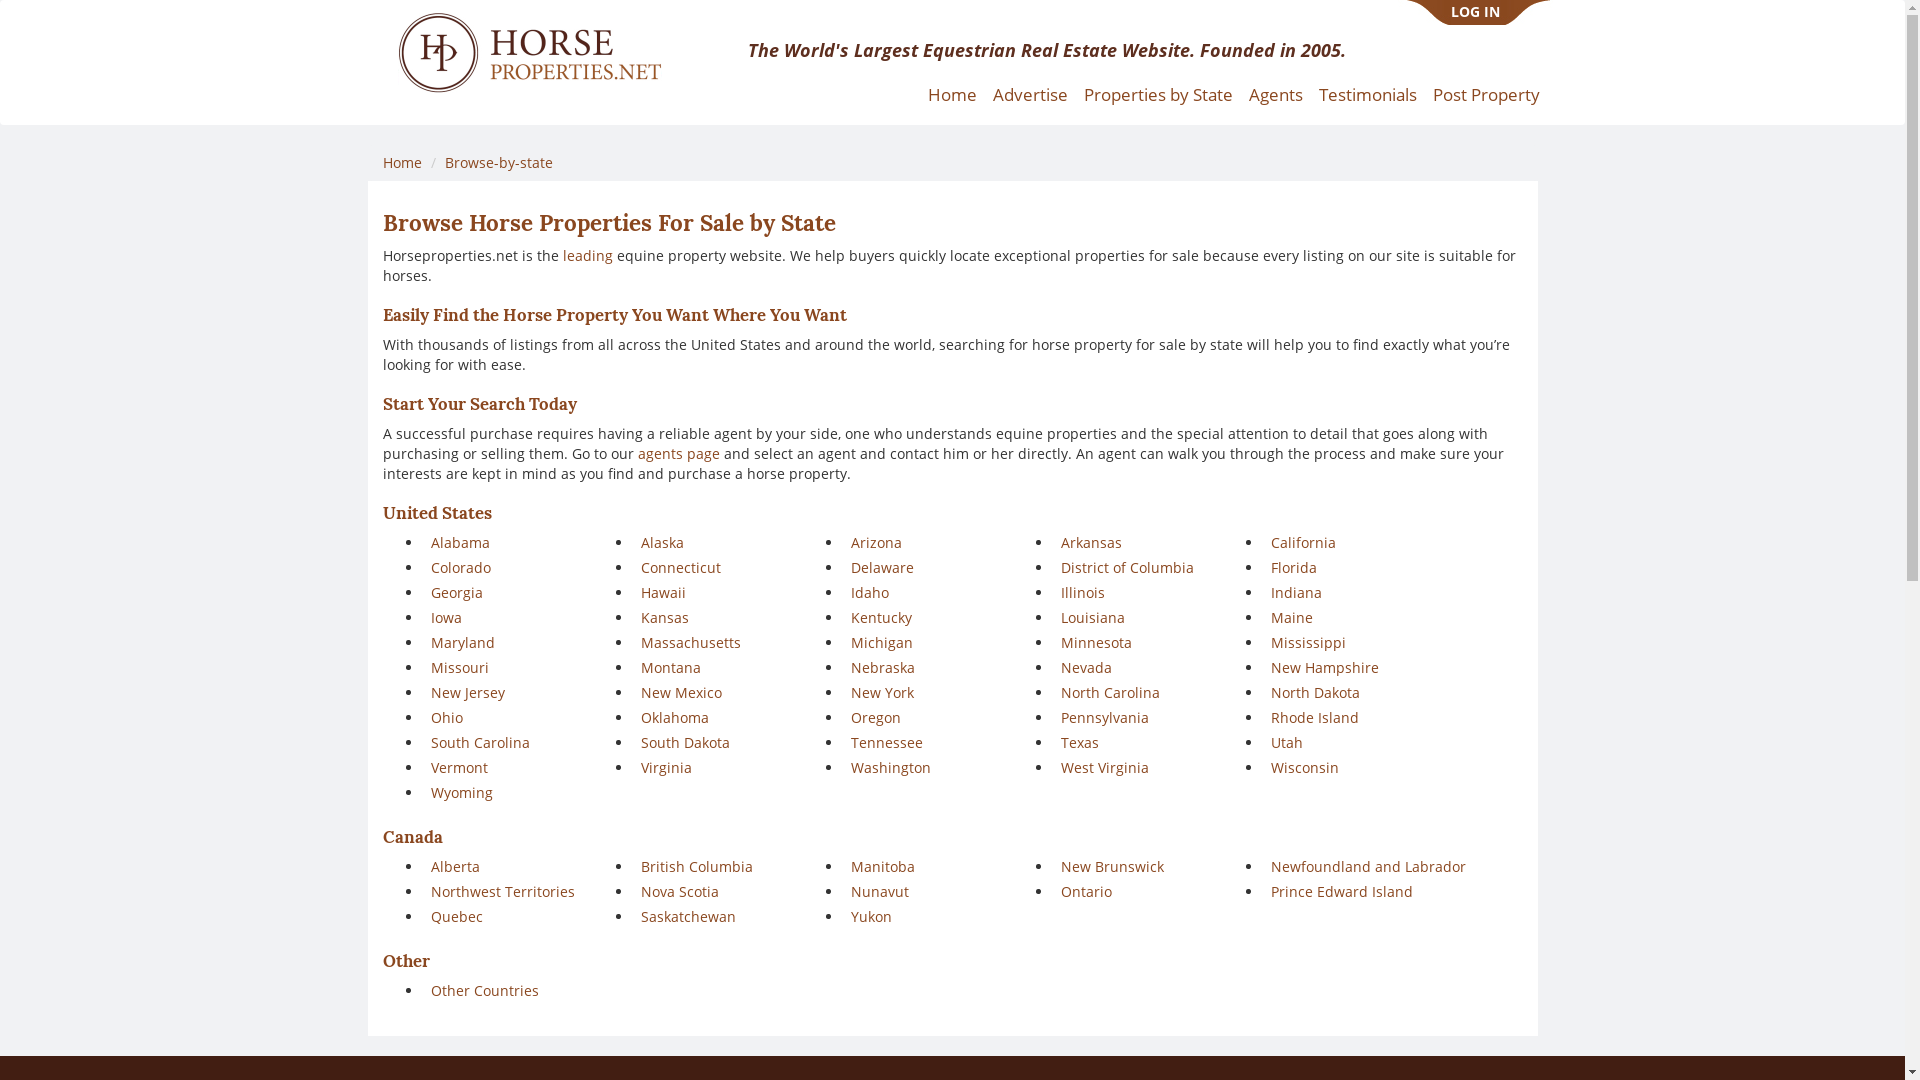

In [ ]:
driver = web_driver()
url = 'https://www.horseproperties.net/browse-by-state'
driver.get(url)
from IPython.display import Image, display
display(Image(driver.get_screenshot_as_png()))
html = driver.page_source
# driver.quit()
file1 = open("theFirstScrape.html", "w")
file1.write(html)
file1.flush()
file1.close()


In [ ]:
from selenium.webdriver.common.by import By
LkXpath = """/html/body/div[4]/div/ul[1]/li[1]/a"""
LkButtons = driver.find_elements(by=By.XPATH, value=LkXpath)
print(LkButtons)
LkButton = LkButtons[0]
print(LkButton)
display(Image(LkButton.screenshot_as_png))


[<selenium.webdriver.remote.webelement.WebElement (session="ec3db49d366d44c281f015ca120f2b8d", element="7c3a94fc-331a-45d7-9bdc-8c1f86ab0479")>]
<selenium.webdriver.remote.webelement.WebElement (session="ec3db49d366d44c281f015ca120f2b8d", element="7c3a94fc-331a-45d7-9bdc-8c1f86ab0479")>


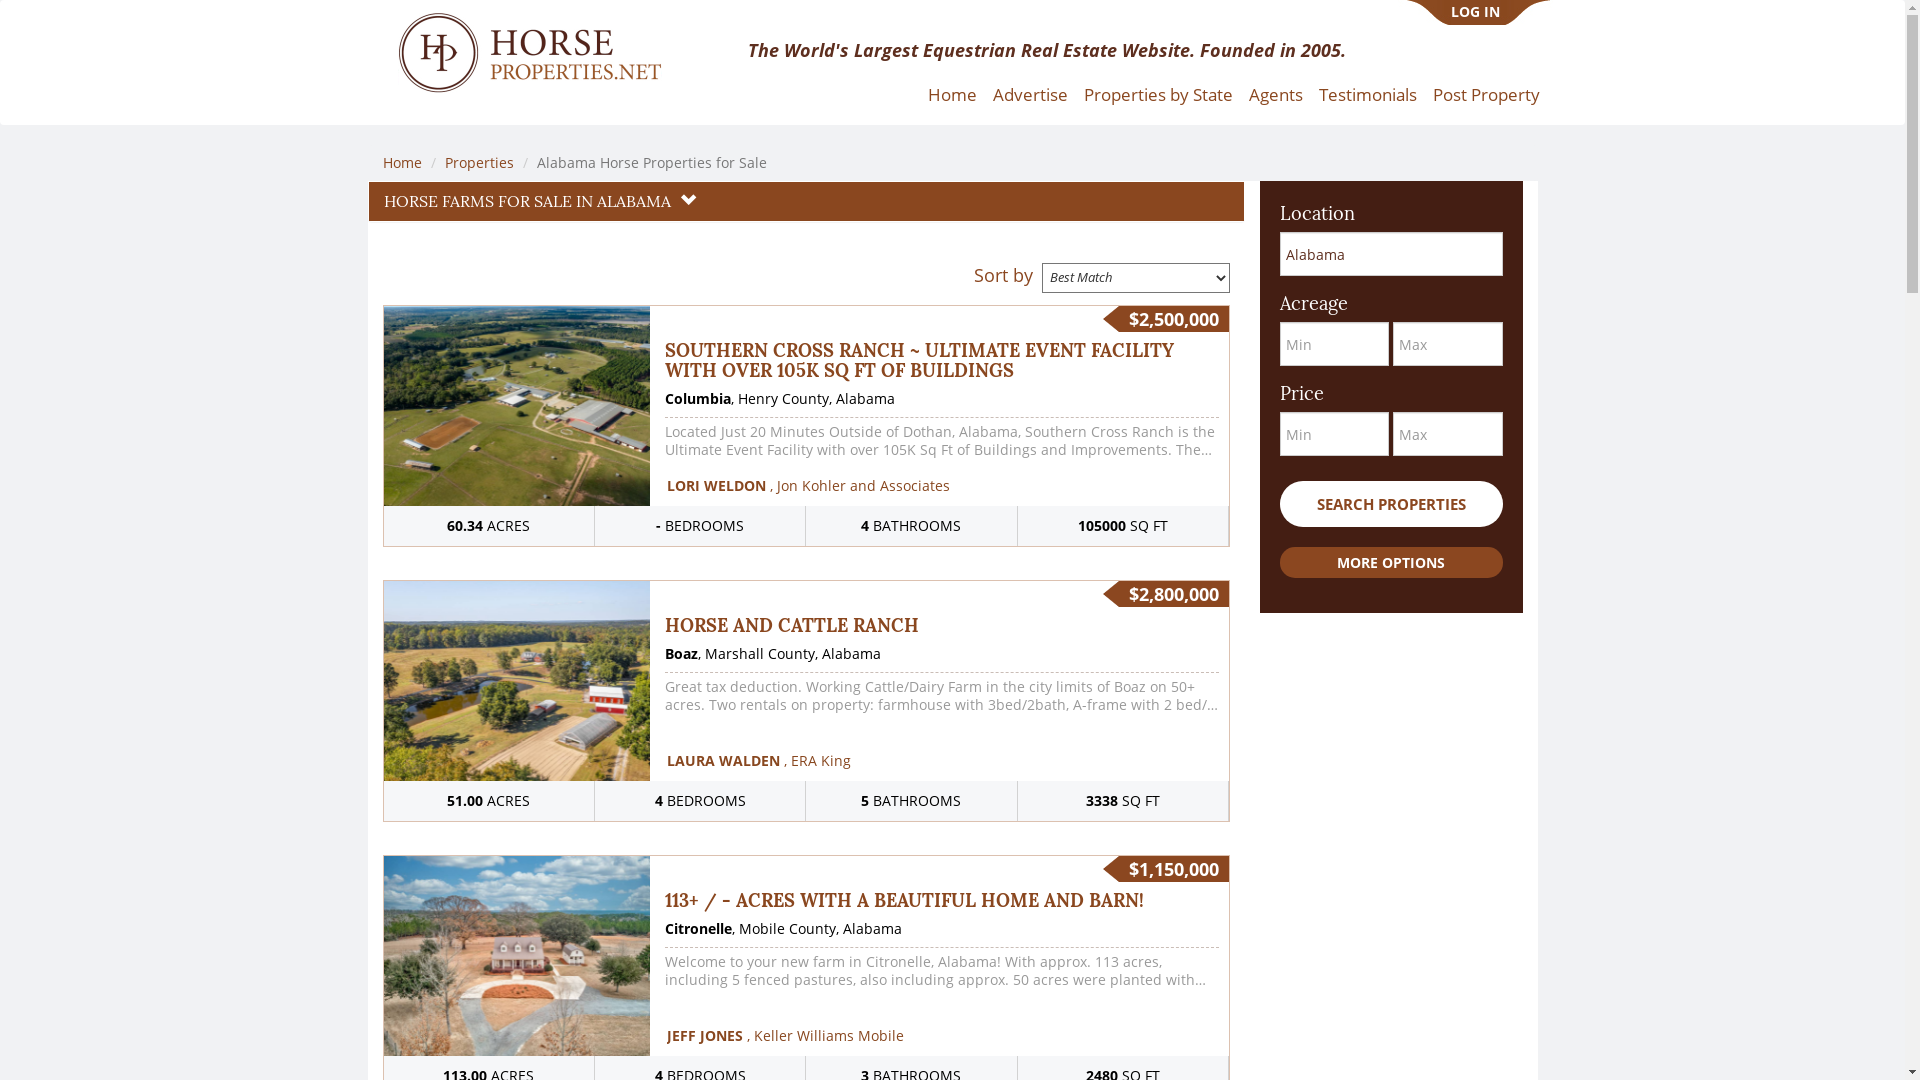

In [ ]:
LkButton.click()
display(Image(driver.get_screenshot_as_png()))
html = driver.page_source
# driver.quit()
file1 = open("theFirstScrape.html", "w")
file1.write(html)
file1.flush()
file1.close()

In [ ]:
driver.window_handles

['CDwindow-95CBD1E15D907562E4C844A623C49E7E']

In [ ]:
elem=driver.find_elements(By.XPATH,'//a[@href]')
print(elem)

[<selenium.webdriver.remote.webelement.WebElement (session="ec3db49d366d44c281f015ca120f2b8d", element="7db2086b-678c-4ee2-8ba8-d1dae0fe99e3")>, <selenium.webdriver.remote.webelement.WebElement (session="ec3db49d366d44c281f015ca120f2b8d", element="04aa4521-d6c3-4083-afe5-4b173df9fbd3")>, <selenium.webdriver.remote.webelement.WebElement (session="ec3db49d366d44c281f015ca120f2b8d", element="a4f45970-57f2-470e-be94-fefc24751267")>, <selenium.webdriver.remote.webelement.WebElement (session="ec3db49d366d44c281f015ca120f2b8d", element="eab54474-72d5-4ddf-a8c5-3c49ada6c015")>, <selenium.webdriver.remote.webelement.WebElement (session="ec3db49d366d44c281f015ca120f2b8d", element="bcd94d46-bb10-4586-a3ab-f5cc16b69c03")>, <selenium.webdriver.remote.webelement.WebElement (session="ec3db49d366d44c281f015ca120f2b8d", element="7d85b6a3-2bc0-4687-8902-b91d5df545a9")>, <selenium.webdriver.remote.webelement.WebElement (session="ec3db49d366d44c281f015ca120f2b8d", element="e9290f42-72b8-42bf-8e01-04eb1e52

In [ ]:
pages=[driver.current_url]
for i in elem:
  if 'page' in i.get_attribute("href"):
    pages.append(i.get_attribute("href"))

In [ ]:
pages = pages[:-1]

In [ ]:
pages

['https://www.horseproperties.net/properties/alabama',
 'https://www.horseproperties.net/properties/alabama/?page=2',
 'https://www.horseproperties.net/properties/alabama/?page=3']

In [ ]:
countylist = []
for page in pages:
  driver.get(page)
  elem1 = driver.find_elements(By.XPATH,'//a[@href]')
for i in elem1:
    if 'county' in i.get_attribute("href") and 'alabama' in i.get_attribute("href"):
      countylist.append(i.get_attribute("href"))

countylist = []
for page in pages:
  #display(Image(driver.get_screenshot_as_png()))
  driver.get(page)
  elem1=driver.find_elements(By.XPATH,'//a[@href]')
  for i in elem1:
    if 'county' in i.get_attribute("href") and 'wyoming/' in i.get_attribute("href"):
      countylist.append(i.get_attribute("href"))
#why is this not pulling more than a couple links check the differences between the two

In [ ]:
countylist

['https://www.horseproperties.net/properties/alabama/henry-county/columbia/65297',
 'https://www.horseproperties.net/properties/alabama/marshall-county/boaz/65579',
 'https://www.horseproperties.net/properties/alabama/mobile-county/citronelle/65290',
 'https://www.horseproperties.net/properties/alabama/madison-county/harvest/57403',
 'https://www.horseproperties.net/properties/alabama/mobile-county/citronelle/64834',
 'https://www.horseproperties.net/properties/alabama/tuscaloosa-county/buhl/64712',
 'https://www.horseproperties.net/properties/alabama/clay-county/lineville/64659',
 'https://www.horseproperties.net/properties/alabama/morgan-county/decatur/64607',
 'https://www.horseproperties.net/properties/alabama/madison-county/brownsboro/59669',
 'https://www.horseproperties.net/properties/alabama/pike-county/troy/63720',
 'https://www.horseproperties.net/properties/alabama/macon-county/notasulga/63181',
 'https://www.horseproperties.net/properties/alabama/autauga-county/prattville/6

In [ ]:
driver = web_driver()
for county in countylist:
  driverdata = driver.get(county)
  #display(Image(driver.get_screenshot_as_png()))
  title = driver.find_element(By.XPATH,'/html/body/div[5]/div[1]').text.replace("\n",' ')
  #title = driver.find_element(By.XPATH,'/html/body/div[5]/div').text#.replace("\n",' ')
  print(title)
  #print(driverdata)

$2,500,000 SOUTHERN CROSS RANCH ~ ULTIMATE EVENT FACILITY WITH OVER 105K SQ FT OF BUILDINGS Columbia , Henry County , Alabama
$2,800,000 HORSE AND CATTLE RANCH Boaz , Marshall County , Alabama
$1,150,000 113+/- ACRES WITH A BEAUTIFUL HOME AND BARN! Citronelle , Mobile County , Alabama
$4,599,993 EQUESTRIAN ESTATE WITH LUXURY HOME!! Harvest , Madison County , Alabama
$920,000 SPACIOUS ESTATE AND EQUESTRIAN ACREAGE FOR PERSONAL OR B&B USE Citronelle , Mobile County , Alabama
$1,450,000 BEAUTIFUL HOME WITH MULTIPLE BARNS ON 123 ACRES Buhl , Tuscaloosa County , Alabama
$1,499,900 MOUNTAIN VIEW FARM - 297+/- ACRES Lineville , Clay County , Alabama
$1,850,000 EQUESTRIAN ESTATE NEAR HUNTSVILLE, TN RIVER & WHEELER WILDLIFE REFUGE Decatur , Morgan County , Alabama
$3,400,000 LUXURY EQUESTRIAN ESTATE ON 51 ACRES, INCREDIBLE HOME NEAR DOWNTOWN HUNTSVILLE Brownsboro , Madison County , Alabama
$399,900 HORSE FARM WITH 14 STALL BARN AND LARGE WORKSHOP ON 12.24 ACRES Troy , Pike County , Alabama
$2,6

In [ ]:
Property_title = []
ACRES = []
Number_of_bedrooms = []
Number_of_bathrooms = []
Prices = []
SQFeet = []
Property_description = []
Property_details = []
Location = []
website_link = []


Property_title = driver.find_element(By.XPATH,'/html/body/div[3]/div[1]').text.replace("\n",' ')
Property_title

"LOG IN The World's Largest Equestrian Real Estate Website. Founded in 2005. Home Advertise Properties by State Agents Testimonials Post Property"

In [ ]:
def transform(pages):
    entries = []

    for soup in pages:
        divs_info = soup.find_all('div', class_="property-info")
        divs_estimate = soup.find_all('div', class_="mb-srp__card__estimate")

        for info, estimate in zip(divs_info, divs_estimate):
            place = info.find('body').text.strip()
            Property_title = info.find('div', class_='h5')
            Property = Property_title.text.strip() if Property_title else "N/a"
            ACRES = info.find('div', class_='col-md-3 col-sm-3 col-xs-3 column text-center')
            ACRE = ACRES.text.strip() if ACRES else "N/a"
            Price = estimate.find('div', clas'/html/body/div[4]/div/div[2]/div[3]/a[1]/div[2]/div[4]/div[3]')
            Price = Price_element.text.strip() if Price_element else "N/a"
            SQFT = estimate.find('div', class_='mb-srp__card__price--size')
            Sqft = Sqft_element.text.strip() if Sqft_element else "N/a"
            entries.append([place, Developer, Summary, Price, Sqft])

    return entries


['https://www.horseproperties.net/properties/alabama',
 'https://www.horseproperties.net/properties/alabama/?page=2',
 'https://www.horseproperties.net/properties/alabama/?page=3']

In [ ]:
df = pd.dataframe({'Property title': Property_title, 'ACRES': ACRES, 'Number of bedrooms': Number_of_bedrooms, 'Number of bath room': Number_of_bathrooms, 'Prices': Prices, 'Living area in SQ Feets': SQfeet, 'Property description': Property_description, 'Property details': Property_details, 'Location': Location, 'website link': website_link})

references

https://medium.com/@anoopjohny2000/web-scraping-real-estate-data-with-selenium-and-beautifulsoup-a-practical-guide-f01c0ad6a079

https://www.browserstack.com/guide/css-selectors-in-selenium
